# Tensorflow Test

## 变量共享
Tensorflow通过`tensorflow.variable_scope`和`tesorflow.get_variable`实现。

``` python
tf.get_variable(name,
    shape=None,
    dtype=None,
    initializer=None,
    regularizer=None,
    trainable=True,
    collections=None,
    caching_device=None,
    partitioner=None,
    validate_shape=True,
    use_resource=None,
    custom_getter=None,
    constraint=None
)
```
**共享条件: 变量的scope相同。**

In [1]:
import tensorflow as tf

with tf.variable_scope('v_scope', reuse=False) as scope1:
    W1 = tf.get_variable('w', shape=[3,4], initializer=tf.random_normal_initializer())
    
with tf.variable_scope('v_scope', reuse=True) as scope2:
    W2 = tf.get_variable('w')

print(W1)
print(W2)
print(W1 is W2)

<tf.Variable 'v_scope/w:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'v_scope/w:0' shape=(3, 4) dtype=float32_ref>
True


## 激活函数Softplus
$Softplus(x)=log(1+e^{x})$

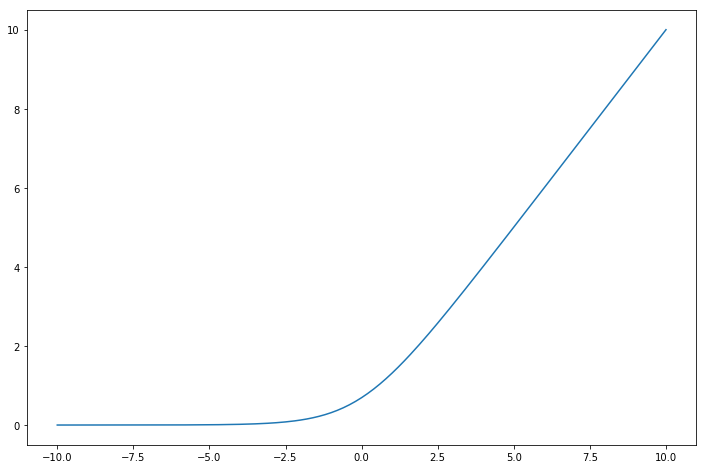

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 201)
y = np.log(1+np.power(np.e, x))

plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.show()

### [tf.reshape](https://www.tensorflow.org/api_docs/python/tf/reshape)
``` python
tf.reshape(
    tensor,
    shape,
    name=None
)
```

In [4]:
# tensor 't' is [1, 2, 3, 4, 5, 6, 7, 8, 9]
t = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# tensor 't' has shape [9]
print(tf.reshape(t, [3, 3]))
with tf.Session() as sess:
    a = tf.reshape(t, [3, 3])
    print(a.shape)
    print(a.eval())

Tensor("Reshape:0", shape=(3, 3), dtype=int32)
(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims)
``` python
tf.expand_dims(
    input,
    axis=None,
    name=None,
    dim=None
)
```

In [16]:
import numpy as np
t = np.ones([2, 3, 5])
print(tf.shape(t))
with tf.Session() as sess:
    a = tf.expand_dims(t, 0)  # [1, 2, 3, 5]
    print(a.shape)
    #print(a.eval())
    b = tf.expand_dims(t, 2)  # [2, 3, 1, 5]
    print(b.shape)
    c = tf.expand_dims(t, 3)  # [2, 3, 5, 1]
    print(c.shape)
    

Tensor("Shape_30:0", shape=(3,), dtype=int32)
(1, 2, 3, 5)
(2, 3, 1, 5)
(2, 3, 5, 1)


### [tf.transpose](https://www.tensorflow.org/api_docs/python/tf/transpose)
``` python
tf.transpose(
    a,
    perm=None,
    name='transpose',
    conjugate=False
)
```

In [14]:
x = tf.constant([[[ 1,  2,  3],
                  [ 4,  5,  6]],
                 [[ 7,  8,  9],
                  [10, 11, 12]]])
with tf.Session() as sess:
    t = tf.transpose(x, perm=[2,1,0])
    t1 = tf.transpose(x, perm=[0,1,2])
    print(sess.run(t))
    print(sess.run(t1))

[[[ 1  7]
  [ 4 10]]

 [[ 2  8]
  [ 5 11]]

 [[ 3  9]
  [ 6 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


### [tf.train.AdamOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer)
方法:
``` python
__init__(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)
```

``` python
minimize(
    loss,
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)
```


In [15]:
import numpy as np
 
x = tf.placeholder(tf.float32, shape=[None, 1], name='x')
y = tf.placeholder(tf.float32, shape=[None, 1], name='y')
w = tf.Variable(tf.constant(0.0))
 
global_steps = tf.Variable(0, trainable=False)

learning_rate = tf.train.exponential_decay(0.1, global_steps, 10, 2, staircase=False)
loss = tf.pow(w*x-y, 2)

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_steps)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10):
        sess.run(train_step, feed_dict={x:np.linspace(1,2,10).reshape([10,1]),
            y:np.linspace(1,2,10).reshape([10,1])})
        print(sess.run(learning_rate))
        print(sess.run(global_steps))

0.107177
1
0.11487
2
0.123114
3
0.131951
4
0.141421
5
0.151572
6
0.16245
7
0.17411
8
0.186607
9
0.2
10


### [tf.reduce_mean](https://www.tensorflow.org/api_docs/python/tf/reduce_mean)
计算平均值:
``` python
tf.reduce_mean(
    input_tensor,
    axis=None,
    keepdims=None,
    name=None,
    reduction_indices=None,
    keep_dims=None
)
```

In [16]:
x = tf.constant([[1., 1.], [2., 2.]])

with tf.Session() as sess:
    print(sess.run(tf.reduce_mean(x)))
    print(sess.run(tf.reduce_mean(x, axis=0)))
    print(sess.run(tf.reduce_mean(x, axis=1)))

1.5
[ 1.5  1.5]
[ 1.  2.]


### `tf.app.run()`和`tf.app.flags.FLAGS`


In [1]:
import tensorflow as tf

flags = tf.app.flags

flags.DEFINE_string('string', 'train', 'This is a string')
flags.DEFINE_float('learning_rate', 0.001, 'This is the rate in training')
flags.DEFINE_boolean('flag', True, 'This is a flag')
FLAGS = flags.FLAGS

def main(unuse_args):
    print('string: ', FLAGS.string)
    print('learning_rate: ', FLAGS.learning_rate)
    print('flag: ', flags.FLAGS.flag)
    
#tf.app.run()
main(1)

string:  train
learning_rate:  0.001
flag:  True


### [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)

``` python
tf.nn.conv2d(
    input,
    filter,
    strides,
    padding,
    use_cudnn_on_gpu=True,
    data_format='NHWC',
    dilations=[1, 1, 1, 1],
    name=None
)
```

In [2]:
import numpy as np

i = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]).reshape(1, 4, 4, 1)
#print(_input)
#print(_input.shape)
f= np.ones((2, 2, 1, 2))
f[0,1,0,1] = 0
f[1,0,0,1] = 0
#print(_filter[:,:,0,1])
#print(_filter.shape)
_input = tf.placeholder(tf.float32, [1,4,4,1])        # [batch_size, height, width, channels]
_filter = tf.placeholder(tf.float32, [2,2,1,2])       # [filter_height, filter_width, in_channels, out_channels]

conv1 = tf.nn.conv2d(_input, _filter,strides=[1,1,1,1], padding='SAME')
conv2 = tf.nn.conv2d(_input, _filter,strides=[1,1,1,1], padding='VALID')

with tf.Session() as sess:
    c1 = sess.run(conv1,{_input: i, _filter: f})
    print('SAME padding:\n {}'.format(c1[0,:,:,0]))
    print('Shape = ',c1.shape)
    c2 = sess.run(conv2,{_input: i, _filter: f})
    print('VALID padding:\n {}'.format(c2[0,:,:,0]))
    print('Shape = ',c2.shape)

SAME padding:
 [[ 14.  18.  22.  12.]
 [ 30.  34.  38.  20.]
 [ 46.  50.  54.  28.]
 [ 27.  29.  31.  16.]]
Shape =  (1, 4, 4, 2)
VALID padding:
 [[ 14.  18.  22.]
 [ 30.  34.  38.]
 [ 46.  50.  54.]]
Shape =  (1, 3, 3, 2)


### [tf.nn.conv2d_transpose](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d_transpose)

``` python
tf.nn.conv2d_transpose(
    value,
    filter,
    output_shape,
    strides,
    padding='SAME',
    data_format='NHWC',
    name=None
)
```

In [4]:
ipt = tf.constant(1.0, shape=[1, 3, 3, 1])        # [batch_size, height, width, channels]
f = tf.constant(1.0, shape=[3, 3, 2, 1])        # [filter_height, filter_width, out_channels, in_channels]

deconv = tf.nn.conv2d_transpose(ipt, f, output_shape=[1, 6, 6, 2], strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
    c1 = sess.run(deconv)
    print('SAME padding:\n {}'.format(c1[0,:,:,0]))
    print('Shape = ',c1.shape)
    

SAME padding:
 [[ 1.  1.  2.  1.  2.  1.]
 [ 1.  1.  2.  1.  2.  1.]
 [ 2.  2.  4.  2.  4.  2.]
 [ 1.  1.  2.  1.  2.  1.]
 [ 2.  2.  4.  2.  4.  2.]
 [ 1.  1.  2.  1.  2.  1.]]
Shape =  (1, 6, 6, 2)


### [tf.layers.batch_normalization](https://www.tensorflow.org/api_docs/python/tf/layers/batch_normalization)

``` python
tf.layers.batch_normalization(
    inputs,
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer=tf.zeros_initializer(),
    gamma_initializer=tf.ones_initializer(),
    moving_mean_initializer=tf.zeros_initializer(),
    moving_variance_initializer=tf.ones_initializer(),
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    training=False,
    trainable=True,
    name=None,
    reuse=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    virtual_batch_size=None,
    adjustment=None
)
```

### [tf.nn.bias_add](https://www.tensorflow.org/api_docs/python/tf/nn/bias_add)

``` python
tf.nn.bias_add(
    value,
    bias,
    data_format=None,
    name=None
)
```

### [tf.summary.histogram](https://www.tensorflow.org/api_docs/python/tf/summary/histogram)

``` python
tf.summary.histogram(
    name,
    values,
    collections=None,
    family=None
)
```